## <font style="font-family:roboto;color:#455e6c"> Introduction to Simulations with Pyiron </font>  

<div class="admonition note" name="html-admonition" style="background:#e3f2fd; padding: 10px">
<font style="font-family:roboto;color:#455e6c"> <b> StahlDigital Tutorial: Creating and Running Simulations for Steel Development </b> </font> </br>
<font style="font-family:roboto;color:#455e6c"> 25 April 2024 </font>
</div>

Before the excercise, you should:

* Be familiar with python especially with numerical libraries like numpy and plotting tools like matplotlib
* Understand how Jupyter Notebook works

The aim of this exercise is to make you familiar with:

* A general overview of pyiron functionality
* How to set up atomic structures and run simulation codes through pyiron

### <font style="font-family:roboto;color:#455e6c"> Import necessary libraries </font>  
As a first step we import the libraries [numpy](http://www.numpy.org/) for data analysis and [matplotlib](https://matplotlib.org/) for visualization.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt

Fundamentally, we only need to import one module from `pyiron`: the `Project` class

In [2]:
from pyiron import Project

The Project object introduced below is central in pyiron. It allows to name the project as well as to derive all other objects such as structures, jobs etc. without having to import them. Thus, by code completion *Tab* the respective commands can be found easily.

We now create a pyiron Project named *'intro_pyiron'.*

### <font style="font-family:roboto;color:#455e6c"> Working with atomistic structures </font>  

#### <font style="font-family:roboto;color:#455e6c"> Creation of a project instance </font>  

In [3]:
pr = Project("intro_pyiron")

The project name also applies for the directory that is created for the project. All data generated by this `Project` object resides in this directory.

In [4]:
pr.path

'/home/jovyan/00_pyiron_damask_tutorial/intro_pyiron/'

In [5]:
pr

{'groups': [], 'nodes': []}

The `groups` and `nodes` will be populated later, as we add jobs and sub project to it.

#### <font style="font-family:roboto;color:#455e6c"> Creating atomic structures </font>  

Every atomistic simulation needs an atomic structure. For more details on generating and manipulating structures, please have a look at our [structures example](https://pyiron.readthedocs.io/en/latest/source/notebooks/structures.html). In this section however, we show how to generate and manipulate bulk crystals. pyiron's structure class is derived from the popular [ASE](https://wiki.fysik.dtu.dk/ase/ase/build/build.html) package and any `ASE` function to manipulate structures can also be applied here.

Creating a bulk bcc cubic unitcell

In [6]:
unitcell_bcc_Fe = pr.create.structure.bulk('Fe', cubic=True, crystalstructure='bcc', a=2.84)
unitcell_bcc_Fe

Fe: [0. 0. 0.]
Fe: [1.42 1.42 1.42]
tags: 
    indices: [0 0]
pbc: [ True  True  True]
cell: 
Cell([2.84, 2.84, 2.84])

In [7]:
unitcell_bcc_Fe.plot3d()

NGLWidget()

Creating a super cell.

In [8]:
supercell_bcc_Fe_4_4_4 = unitcell_bcc_Fe.repeat([4, 4, 4])

In [9]:
supercell_bcc_Fe_4_4_4.plot3d()

NGLWidget()

In [10]:
supercell_bcc_Fe_4_4_4.get_chemical_formula()

'Fe128'

Replace one atom in the supercell with Ni

In [11]:
supercell_bcc_Fe127Ni1 = supercell_bcc_Fe_4_4_4.copy()
supercell_bcc_Fe127Ni1[0] = "Ni" # Replacing the first Fe atom with Ni

In [12]:
supercell_bcc_Fe127Ni1.get_chemical_formula()

'Fe127Ni'

In [13]:
supercell_bcc_Fe127Ni1.plot3d()

NGLWidget()

### <font style="font-family:roboto;color:#455e6c"> Running an atomistic calculation using interatomic potentials (with LAMMPS) </font>  


Once we have an atomic structure, we can set up a simulation "job" of any atomistic simulation that is intergrated within pyiron. In this section, we are going to use the popular code [LAMMPS](https://lammps.sandia.gov/). For more details on how to steup a pyiron `job` have a look at [here](https://pyiron.readthedocs.io/en/latest/source/notebooks/first_steps.html)

In [14]:
# Create a job
job_lammps = pr.create.job.Lammps("lammps_simulation")

Every atomistic simulation code needs an input atomic structure. We use the Fe supercell structure we created earlier

In [15]:
# Assign an atomic structure to the job
job_lammps.structure = pr.create.structure.bulk('Fe', cubic=True, a=2.84).repeat(4)

Once the structure is assigned, an appropriate potential should also be chosen. This list of available for the structure containing Fe can be found below.  This list originates from the [NIST Interatomic Potential Database](https://www.ctcms.nist.gov/potentials/).

In [16]:
# See available potentials
job_lammps.list_potentials()[:12]

['1997--Ackland-G-J--Fe--LAMMPS--ipr1',
 '1998--Meyer-R--Fe--LAMMPS--ipr1',
 '2001--Lee-B-J--Fe--LAMMPS--ipr1',
 '2001--Lee-B-J--Fe-Cr--LAMMPS--ipr1',
 '2003--Mendelev-M-I--Fe-2--LAMMPS--ipr3',
 '2003--Mendelev-M-I--Fe-5--LAMMPS--ipr1',
 '2004--Ackland-G-J--Fe-P--LAMMPS--ipr1',
 '2004--Zhou-X-W--Fe--LAMMPS--ipr2',
 '2005--Lee-B-J--Fe-Cu--LAMMPS--ipr1',
 '2005--Mendelev-M-I--Al-Fe--LAMMPS--ipr1',
 '2006--Chamati-H--Fe--LAMMPS--ipr1',
 '2006--Kim-J--Fe-Pt--LAMMPS--ipr1']

In [17]:
# Choose one of these potentials
job_lammps.potential = '2005--Mendelev-M-I--Al-Fe--LAMMPS--ipr1'

At this stage, the computational parameters for the simulation needs to be specified. pyiron parses generic computational parameters into code specific parameters allowing for an easy transition between simulation codes

In [18]:
# specify calculation details: in this case, a molecular dynamics simulation
job_lammps.calc_md(temperature=600, n_print=50,  n_ionic_steps=10000)

We can now see how pyiron sets-up the corresponding LAMMPS input

In [19]:
job_lammps.input.control

,Parameter,Value,Comment
0,units,metal,
1,dimension,3,
2,boundary,p p p,
3,atom_style,atomic,
4,read_data,structure.inp,
5,include,potential.inp,
6,fix___ensemble,all nvt temp 600.0 600.0 0.1,
7,variable___dumptime,equal 50,
8,variable___thermotime,equal 50,
9,timestep,0.001,


Once the `run()` commmand is called, pyiron creates necessary input files, calls the simulation code, and finally parses and stores the output.

In [20]:
job_lammps.run()

The job lammps_simulation was saved and received the ID: 1


When printing the project, the saved job will also appear under `nodes` now.

In [21]:
pr

{'groups': [], 'nodes': ['lammps_simulation']}

You can get a quick overview with the `job_table` method.

In [22]:
pr.job_table()

,id,status,chemicalformula,job,subjob,projectpath,project,timestart,timestop,totalcputime,computer,hamilton,hamversion,parentid,masterid
0,1,finished,Fe128,lammps_simulation,/lammps_simulation,/home/jovyan/,00_pyiron_damask_tutorial/intro_pyiron/,2024-04-27 13:23:44.103361,2024-04-27 13:23:48.318803,4.0,pyiron@jupyter-pyiron-2ddsms-5fexample-2dnwvhe75z#1,Lammps,0.1,None,None


Once it is finished we can access the parsed output.

In [23]:
job_lammps['output']

{'groups': ['generic', 'structure'], 'nodes': []}

In [24]:
%matplotlib inline

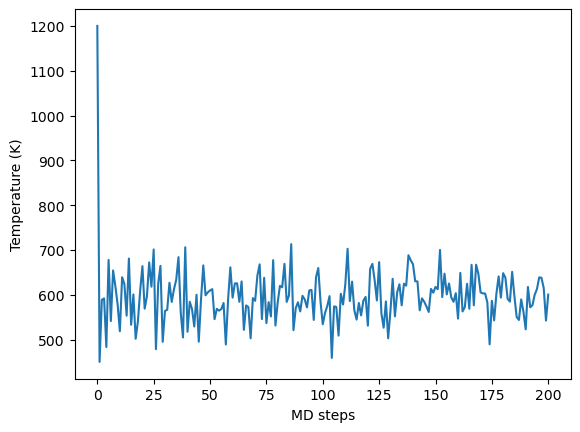

In [25]:
plt.plot(job_lammps['output/generic/temperature'], "-")
plt.xlabel("MD steps")
plt.ylabel("Temperature (K)")
plt.show();

In [26]:
job_lammps.animate_structures()

NGLWidget(max_frame=200)

### <font style="font-family:roboto;color:#455e6c"> Running an atomistic simulation to calculate elastic tensors of bcc iron </font>  

We will use pyiron `Lammps` and `ElasticTensor` jobs to calculate the elastic tensors.

In [27]:
# First, we create and optimizate the structure as we did before
job_mini = pr.create.job.Lammps(job_name='lammps_mini_job')
job_mini.structure = pr.create.structure.bulk("Fe", "bcc", cubic=True)
job_mini.potential = '2005--Mendelev-M-I--Al-Fe--LAMMPS--ipr1'
job_mini.calc_minimize(pressure=0.0, n_print=1)
job_mini.run()

The job lammps_mini_job was saved and received the ID: 2


#### <font style="font-family:roboto;color:#455e6c"> Create and run a job to calculate elastic tensor </font> 


Now, we need a reference job for elastic tensor calculation. We will create a static lammps job as reference job. 

In [28]:
job_ref = pr.create.job.Lammps(job_name='lammps_ref_job')
job_ref.structure = job_mini.get_structure(-1) # Assign the already optimized structure to this job
job_ref.potential = '2005--Mendelev-M-I--Al-Fe--LAMMPS--ipr1'
job_ref.calc_static()

Next, we will create a `ElasticTensor` job and assign `job_ref` to this job

In [29]:
job_elastic = pr.create.job.ElasticTensor(job_name="elastic_tensor_job")
job_elastic.ref_job = job_ref

In [30]:
job_elastic.input

,Parameter,Value,Comment
0,min_num_measurements,11,minimum number of samples to be taken
1,min_num_points,105,minimum number of data points(number of measurements will be min_num_points/len(rotations))
2,max_strain,0.01,relative volume variation around volume defined by ref_ham
3,polynomial_order,2,
4,additional_points,0,number of additional linear-dependent points to make anharmonic contribution more stable. It should not be larger than 0 if polynomial_order=2
5,strain_matrices,[],List of strain matrices (generated automatically if not set)
6,use_symmetry,True,Whether to consider box symmetries
7,rotations,[],List of rotation matrices (generated automatically if not set)
8,normalize_magnitude,False,"Whether or normalize magnitude, so that the Frobenius norm is always max_strain"
9,use_elements,True,Whether or not consider chemical elements for the symmetry analysis. Could be useful for SQS


In [31]:
# Call the run function
job_elastic.run()

The job elastic_tensor_job was saved and received the ID: 3
The job elastic_tensor_job_0 was saved and received the ID: 4
The job elastic_tensor_job_1 was saved and received the ID: 5
The job elastic_tensor_job_2 was saved and received the ID: 6
The job elastic_tensor_job_3 was saved and received the ID: 7
The job elastic_tensor_job_4 was saved and received the ID: 8
The job elastic_tensor_job_5 was saved and received the ID: 9
The job elastic_tensor_job_6 was saved and received the ID: 10
The job elastic_tensor_job_7 was saved and received the ID: 11
The job elastic_tensor_job_8 was saved and received the ID: 12
The job elastic_tensor_job_9 was saved and received the ID: 13
The job elastic_tensor_job_10 was saved and received the ID: 14
The job elastic_tensor_job_11 was saved and received the ID: 15
The job elastic_tensor_job_12 was saved and received the ID: 16
The job elastic_tensor_job_13 was saved and received the ID: 17
The job elastic_tensor_job_14 was saved and received the ID:

Collect the calculated elastic_tensor

In [32]:
elastic_tensor = job_elastic['output/elastic_tensor']

In [33]:
print(elastic_tensor)

[[ 2.43266676e+02  1.45081848e+02  1.45083023e+02  1.74957209e-03
   1.28449847e-03 -1.25754872e-03]
 [ 1.45082710e+02  2.43264736e+02  1.45084336e+02 -6.69231288e-04
   3.61714346e-04  2.41617615e-03]
 [ 1.45081954e+02  1.45080373e+02  2.43268401e+02 -7.08538858e-04
  -2.40803278e-03  1.46912134e-03]
 [-1.18880830e-03 -3.72930447e-04 -3.59814712e-04  1.16089719e+02
  -3.91132331e-04 -4.21856807e-04]
 [ 2.06702241e-04  2.95506247e-05 -4.36964336e-04 -2.66737046e-05
   1.16089575e+02  1.63814978e-04]
 [-5.50175354e-04 -2.88387011e-04  2.24968623e-05 -2.13622470e-04
   1.57482432e-04  1.16089929e+02]]


The elastic tensor is a 6x6 matrix as show below:
\begin{equation}
\begin{pmatrix}
  C_{11}       & C_{12}   & C_{12}   & 0  & 0 & 0  \\
  C_{12}       & C_{11}   & C_{12}   & 0  & 0 & 0  \\
  C_{12}       & C_{12}   & C_{11}   & 0  & 0 & 0  \\
  0            & 0        & 0        & C_{44}  & 0 & 0  \\
  0            & 0        & 0        & 0       & C_{44} & 0  \\
  0            & 0        & 0        & 0       & 0 & C_{44}  \\
\end{pmatrix}
\end{equation}

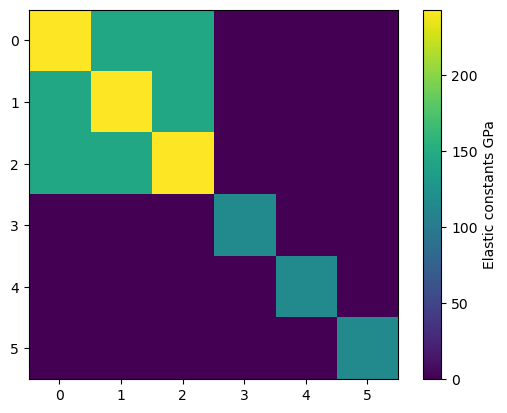

In [34]:
# Display the 6x6 elasticity tensor
plt.imshow(elastic_tensor)
plt.colorbar().set_label('Elastic constants GPa')
plt.show();

### <font style="font-family:roboto;color:#455e6c"> Software used in this notebook </font>  

- [pyiron_atomistics](https://github.com/pyiron/pyiron_atomistics)
- [LAMMPS](https://www.lammps.org/)
- [DAMASK](https://damask.mpie.de/release)